In [1]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("/Users/sunainajain/Desktop/HR_ANALYTICS_DATASET/hr_data_cleaned.csv")

# Preview the data
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionFlag,OverTimeFlag,GenderFlag
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,3,...,8,0,1,6,4,0,5,1,1,0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,2,...,10,3,3,10,7,1,7,0,0,1
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,2,...,7,3,3,0,0,0,0,1,1,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,3,...,8,3,3,8,7,3,0,0,1,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,3,...,6,3,3,2,2,2,2,0,0,1


HOT ENCODING

In [2]:
# Identify categorical columns for one-hot encoding
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# One-hot encode (drop_first=True to avoid dummy trap)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [3]:
df_encoded

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,False,True,False,False,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,False,True,False,False,True,False
2,37,1373,2,2,4,92,2,1,3,2090,...,False,True,False,False,False,False,False,False,False,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,False,True,False,False,True,False
4,27,591,2,1,1,40,3,1,2,3468,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,930,6,3,1,73,2,2,3,4081,...,False,False,False,False,False,True,False,False,False,True
996,27,205,10,3,4,98,2,2,4,5769,...,False,False,False,False,False,False,True,False,True,False
997,27,135,17,4,4,51,3,1,3,2394,...,False,False,False,False,False,True,False,False,False,True
998,26,683,2,1,1,36,2,1,4,3904,...,False,False,False,False,False,True,False,False,False,True


Scale Numerical Features

To prepare for machine learning, we scale the numerical columns (excluding the target Attrition) using StandardScaler.

In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop(['AttritionFlag'], axis=1)
y = df_encoded['AttritionFlag']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_scaled

array([[ 4.25790830e-01,  7.24300233e-01, -9.95330582e-01, ...,
        -2.41248955e-01, -8.90008256e-01,  1.42811543e+00],
       [ 1.27567273e+00, -1.30626592e+00, -1.31649651e-01, ...,
        -2.41248955e-01,  1.12358508e+00, -7.00223511e-01],
       [ 8.49881896e-04,  1.39293137e+00, -8.71947592e-01, ...,
        -2.41248955e-01, -8.90008256e-01,  1.42811543e+00],
       ...,
       [-1.06150249e+00, -1.66155332e+00,  9.78797261e-01, ...,
        -2.41248955e-01, -8.90008256e-01,  1.42811543e+00],
       [-1.16773773e+00, -3.09487396e-01, -8.71947592e-01, ...,
        -2.41248955e-01, -8.90008256e-01,  1.42811543e+00],
       [ 5.32026067e-01,  8.35327544e-01,  1.15116330e-01, ...,
        -2.41248955e-01,  1.12358508e+00, -7.00223511e-01]])

In [6]:
df_clean_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_clean_scaled['AttritionFlag'] = y.values

df_clean_scaled.to_csv("/Users/sunainajain/Desktop/HR_ANALYTICS_DATASET/hr_final_clean_scaled.csv", index=False)


df_clean_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,AttritionFlag
0,0.425791,0.724300,-0.995331,-0.842847,-0.675049,1.427636,0.383723,-0.083385,1.121113,-0.131009,...,-0.45897,-0.292876,-0.340693,-0.238919,-0.507801,1.893979,-0.241249,-0.890008,1.428115,1
1,1.275673,-1.306266,-0.131650,-1.813869,0.248411,-0.206098,-1.037472,-0.083385,-0.700354,-0.309314,...,-0.45897,-0.292876,-0.340693,-0.238919,1.969276,-0.527989,-0.241249,1.123585,-0.700224,0
2,0.000850,1.392931,-0.871948,-0.842847,1.171870,1.328622,-1.037472,-0.961127,0.210379,-0.937412,...,2.17879,-0.292876,-0.340693,-0.238919,-0.507801,-0.527989,-0.241249,-0.890008,1.428115,1
3,-0.424091,1.439810,-0.748565,1.099197,1.171870,-0.453634,0.383723,-0.961127,0.210379,-0.768197,...,-0.45897,-0.292876,-0.340693,-0.238919,1.969276,-0.527989,-0.241249,1.123585,-0.700224,0
4,-1.061502,-0.536477,-0.871948,-1.813869,-1.598508,-1.245747,0.383723,-0.961127,-0.700354,-0.652702,...,2.17879,-0.292876,-0.340693,-0.238919,-0.507801,-0.527989,-0.241249,1.123585,-0.700224,0


In [28]:
print([col for col in df.columns if "job" in col.lower()])

['JobInvolvement', 'JobLevel', 'JobSatisfaction', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']


EDA Analysis - 


“Employees with overtime have a 3x higher attrition rate.”

“Employees with <5 years experience are 2x more likely to leave.”

“Job role: Sales Exec has highest attrition (25%).”

The majority of people who left earn less than ~10,000. Employees with lower monthly income are more likely to leave, indicating that compensation could be a strong driver of attrition.

A downward-sloping line showing that as satisfaction increases, attrition decreases.  -- Improving the work environment—such as facilities, support systems, or team morale—could significantly reduce attrition, especially among dissatisfied employees.

	Employees with lowest satisfaction (1) have the highest attrition rate (~26%).
	Those with excellent satisfaction (4) have the lowest attrition (~13%).




In [7]:
df['AttritionFlag'].value_counts(normalize=True) * 100

AttritionFlag
0    83.3
1    16.7
Name: proportion, dtype: float64

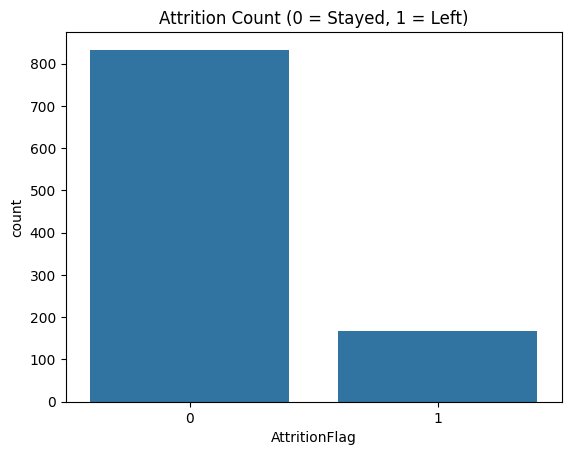

Attrition Rate: 16.70%


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='AttritionFlag', data=df)
plt.title('Attrition Count (0 = Stayed, 1 = Left)')
plt.show()

# Percentage
attrition_rate = df['AttritionFlag'].mean() * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

Employees working overtime are 3x more likely to leave the company compared to those who do not.

In [9]:
# Grouped count
overtime_attrition = df.groupby(['OverTimeFlag', 'AttritionFlag']).size().unstack(fill_value=0)

# Calculate % attrition
overtime_attrition['AttritionRate_%'] = (overtime_attrition[1] / (overtime_attrition[0] + overtime_attrition[1])) * 100
print(overtime_attrition)

AttritionFlag    0   1  AttritionRate_%
OverTimeFlag                           
0              630  72        10.256410
1              203  95        31.879195


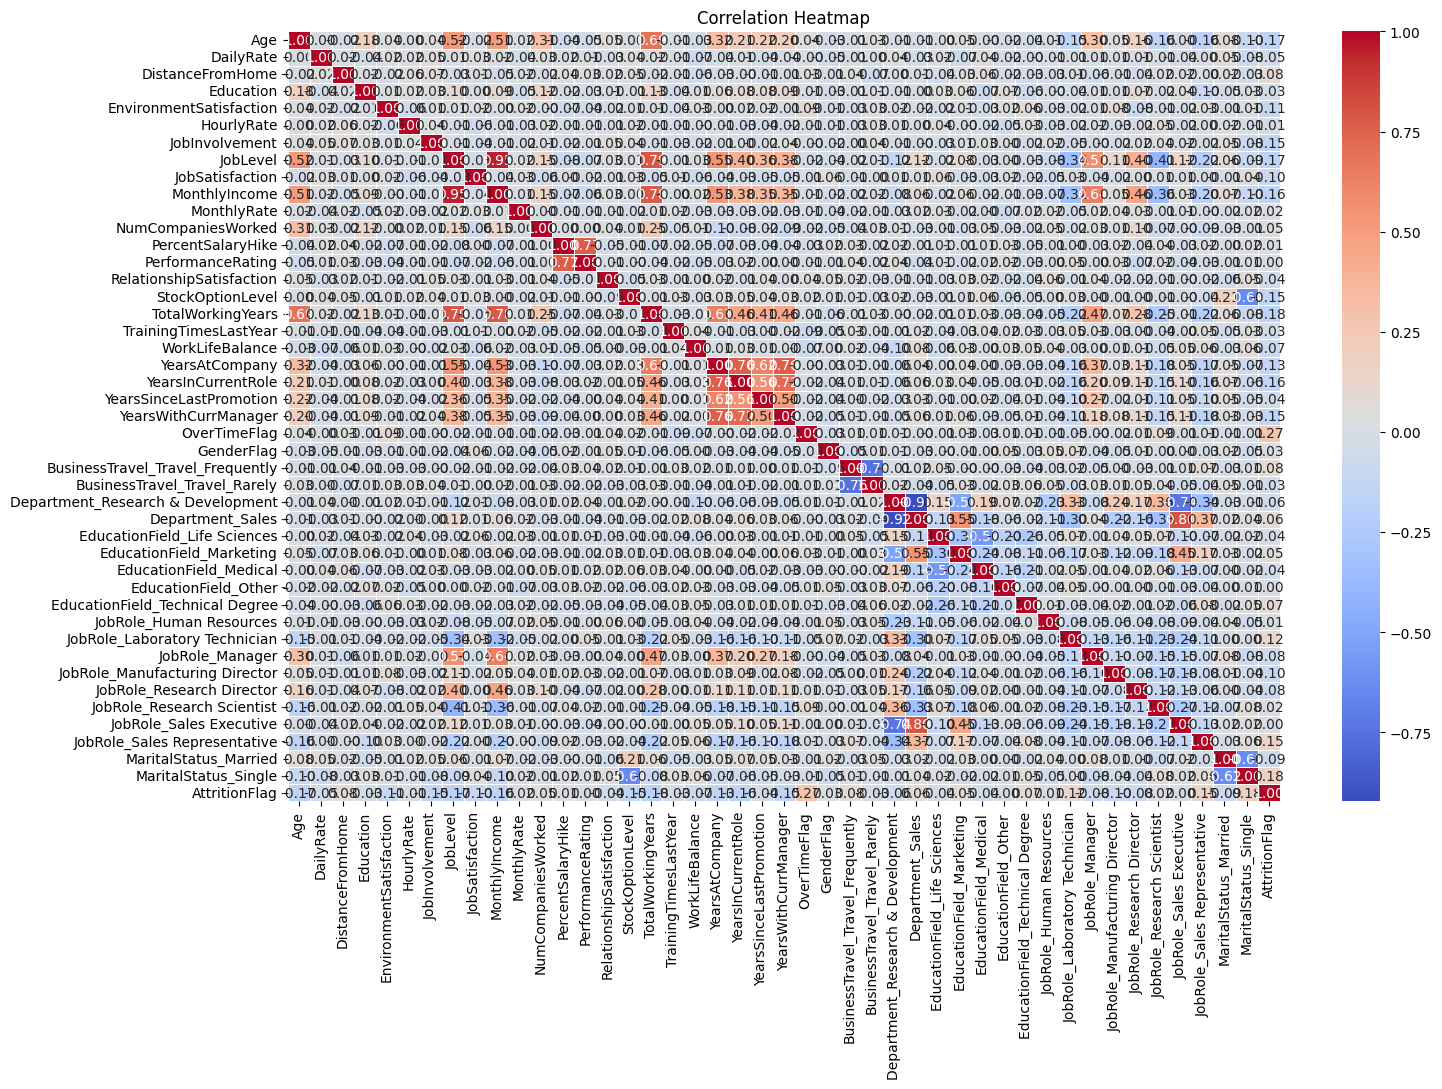

🔺 Top Positive Correlations with Attrition:
 OverTimeFlag                        0.265160
MaritalStatus_Single                0.182929
JobRole_Sales Representative        0.150709
JobRole_Laboratory Technician       0.119817
BusinessTravel_Travel_Frequently    0.081250
Name: AttritionFlag, dtype: float64

🔻 Top Negative Correlations with Attrition:
 YearsInCurrentRole   -0.157465
MonthlyIncome        -0.160453
Age                  -0.167955
JobLevel             -0.169123
TotalWorkingYears    -0.177052
Name: AttritionFlag, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = df_clean_scaled.corr(numeric_only=True)  # in case non-numeric columns are present

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Get correlation of features with Attrition
corr_target = corr['AttritionFlag'].drop('AttritionFlag').sort_values(ascending=False)

# Display top 5 positive and negative correlations
print("🔺 Top Positive Correlations with Attrition:\n", corr_target.head())
print("\n🔻 Top Negative Correlations with Attrition:\n", corr_target.tail())

/var/folders/s3/282ztbvj7cn5_w9yrtscw8ww0000gn/T/ipykernel_27983/2357464709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')


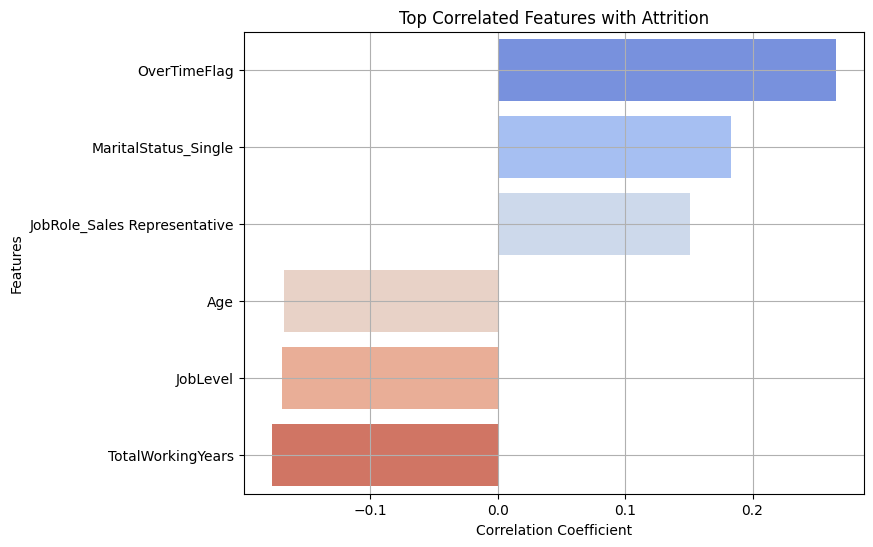

In [11]:
top_features = pd.concat([corr_target.head(3), corr_target.tail(3)])

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title('Top Correlated Features with Attrition')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.show()

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

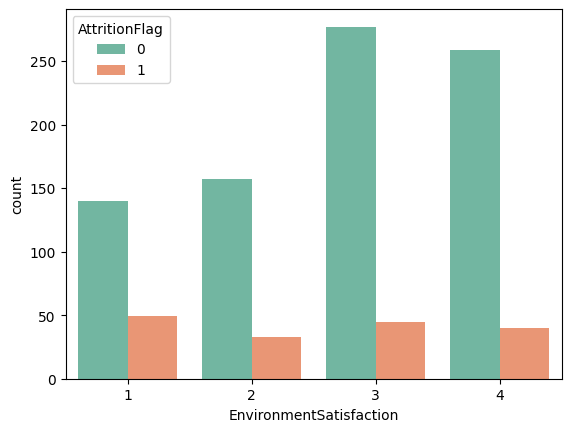

In [12]:
sns.countplot(x='EnvironmentSatisfaction', hue='AttritionFlag', data=df, palette='Set2')

<Axes: title={'center': 'Attrition Rate by Environment Satisfaction'}, xlabel='EnvironmentSatisfaction'>

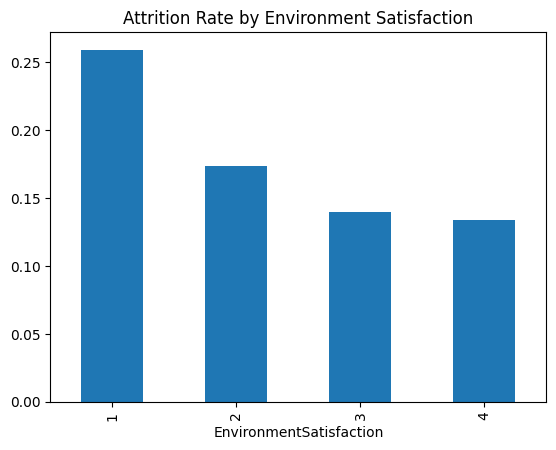

In [13]:
df.groupby('EnvironmentSatisfaction')['AttritionFlag'].mean().plot(kind='bar', title='Attrition Rate by Environment Satisfaction')

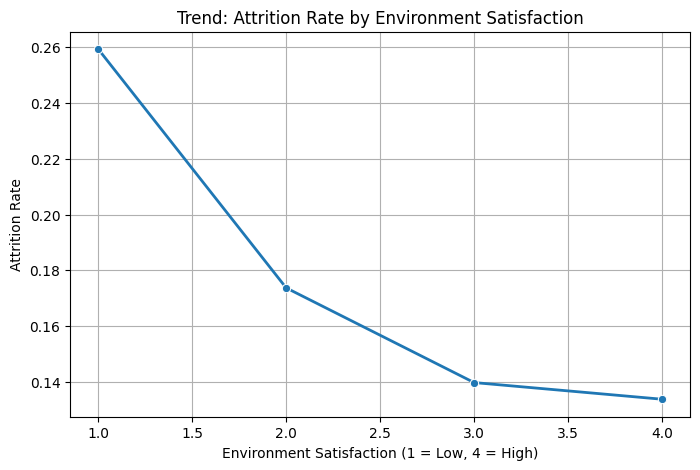

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and calculating mean attrition rate by Environment Satisfaction
env_satisfaction_trend = df.groupby('EnvironmentSatisfaction')['AttritionFlag'].mean().reset_index()

# Plot with trend line
plt.figure(figsize=(8, 5))
sns.lineplot(x='EnvironmentSatisfaction', y='AttritionFlag', data=env_satisfaction_trend, marker='o', linewidth=2)
plt.title('Trend: Attrition Rate by Environment Satisfaction')
plt.xlabel('Environment Satisfaction (1 = Low, 4 = High)')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

A downward-sloping line showing that as satisfaction increases, attrition decreases.

	Employees with lowest satisfaction (1) have the highest attrition rate (~26%).
	Those with excellent satisfaction (4) have the lowest attrition (~13%).

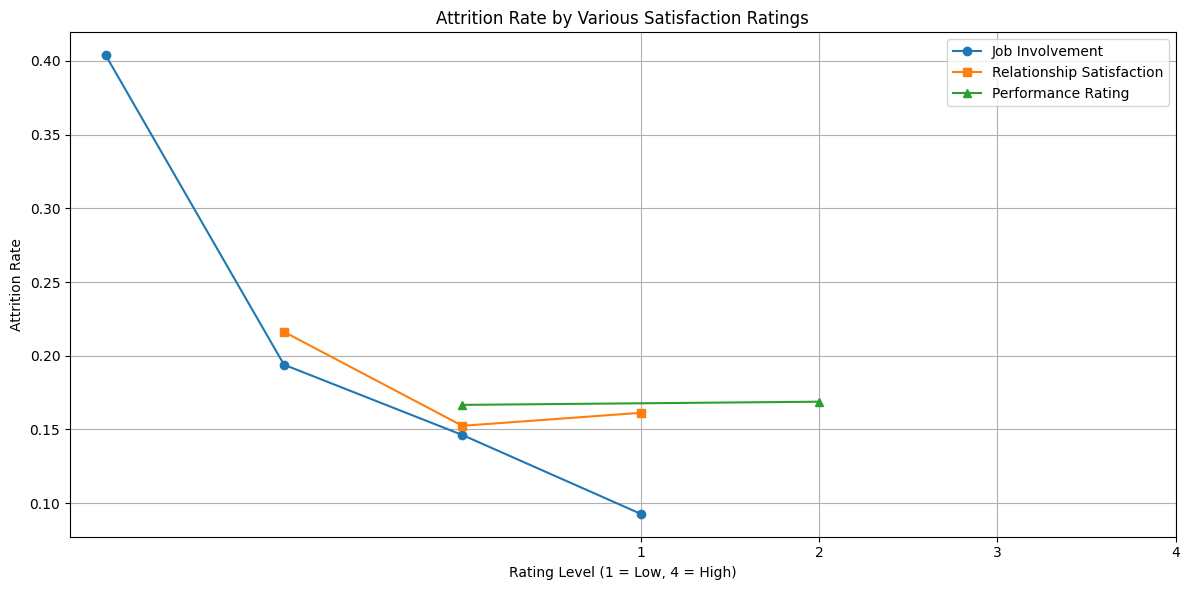

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv("/Users/sunainajain/Desktop/HR_ANALYTICS_DATASET/hr_final_clean_scaled.csv")

# Convert relevant columns to integer if not already (for clarity in groupby)
df['JobInvolvement'] = df['JobInvolvement'].astype(int)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype(int)
df['PerformanceRating'] = df['PerformanceRating'].astype(int)

# Calculate attrition rate for each level of the 3 features
job_inv = df.groupby('JobInvolvement')['AttritionFlag'].mean()
rel_sat = df.groupby('RelationshipSatisfaction')['AttritionFlag'].mean()
perf_rat = df.groupby('PerformanceRating')['AttritionFlag'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(job_inv.index, job_inv.values, marker='o', label='Job Involvement')
plt.plot(rel_sat.index, rel_sat.values, marker='s', label='Relationship Satisfaction')
plt.plot(perf_rat.index, perf_rat.values, marker='^', label='Performance Rating')

plt.title('Attrition Rate by Various Satisfaction Ratings')
plt.xlabel('Rating Level (1 = Low, 4 = High)')
plt.ylabel('Attrition Rate')
plt.legend()
plt.grid(True)
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()

In [16]:
df['DistanceBand'] = pd.cut(df['DistanceFromHome'], 
                            bins=[0, 5, 10, 20, 30], 
                            labels=['0-5km', '6-10km', '11-20km', '21-30km'])

In [17]:
distance_jobinv = df.groupby('DistanceBand')['JobInvolvement'].mean().reset_index()
print(distance_jobinv)

  DistanceBand  JobInvolvement
0        0-5km       -0.200573
1       6-10km             NaN
2      11-20km             NaN
3      21-30km             NaN


/var/folders/s3/282ztbvj7cn5_w9yrtscw8ww0000gn/T/ipykernel_27983/2302849391.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_jobinv = df.groupby('DistanceBand')['JobInvolvement'].mean().reset_index()


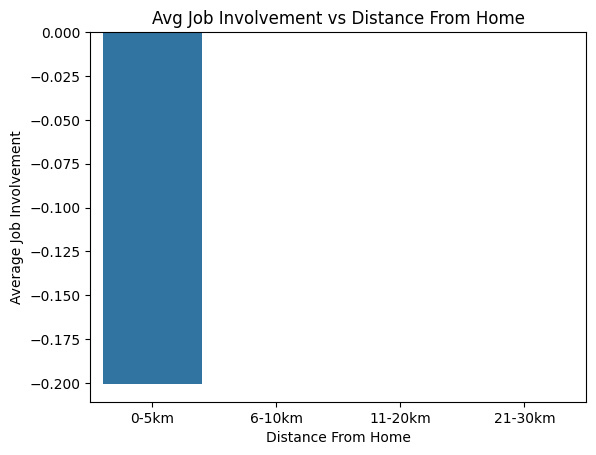

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='DistanceBand', y='JobInvolvement', data=distance_jobinv)
plt.title('Avg Job Involvement vs Distance From Home')
plt.ylabel('Average Job Involvement')
plt.xlabel('Distance From Home')
plt.show()

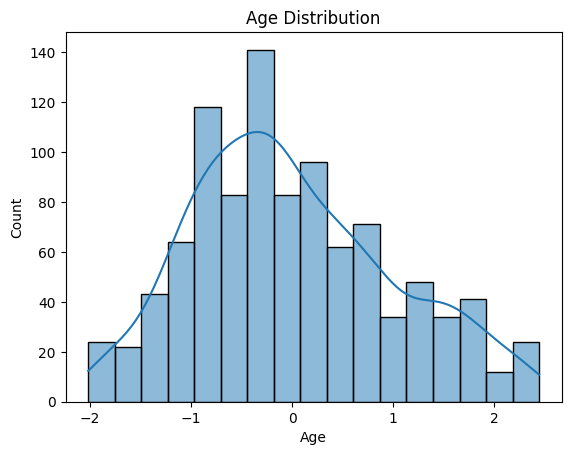

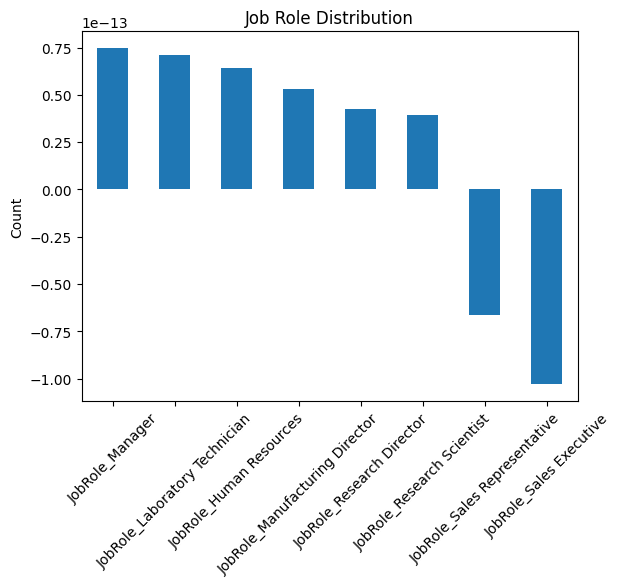

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric: Age
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Categorical: JobRole
# Get all job role columns
job_role_cols = [col for col in df.columns if col.startswith('JobRole_')]

# Sum across each job role column
job_role_counts = df[job_role_cols].sum().sort_values(ascending=False)

# Plot the distribution
job_role_counts.plot(kind='bar')
plt.title('Job Role Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Overtime vs Attrition')

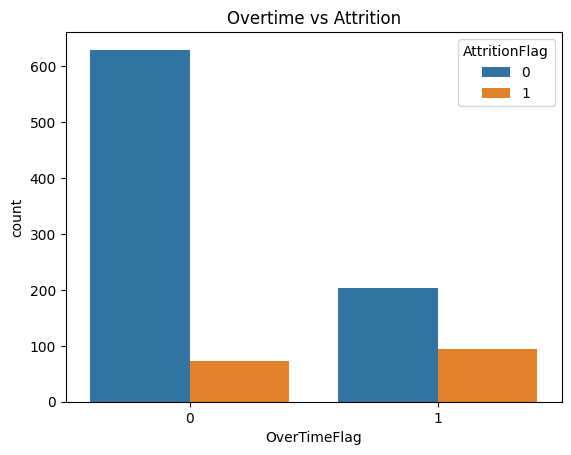

In [27]:
# Overtime vs Attrition
sns.countplot(x='OverTimeFlag', hue='AttritionFlag', data=df)
plt.title("Overtime vs Attrition")



<Axes: xlabel='AttritionFlag', ylabel='MonthlyIncome'>

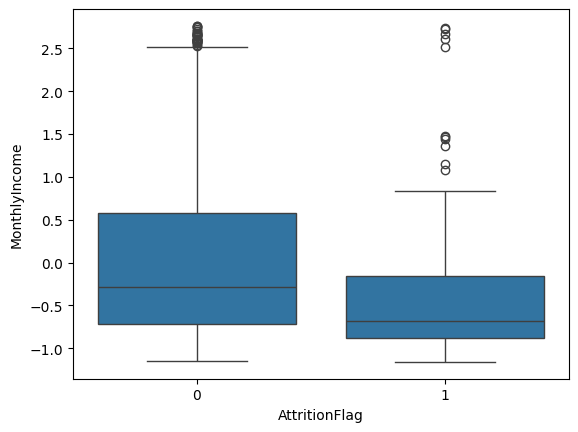

In [20]:
# Monthly Income vs Attrition
sns.boxplot(x='AttritionFlag', y='MonthlyIncome', data=df)



<Axes: xlabel='AttritionFlag', ylabel='DistanceFromHome'>

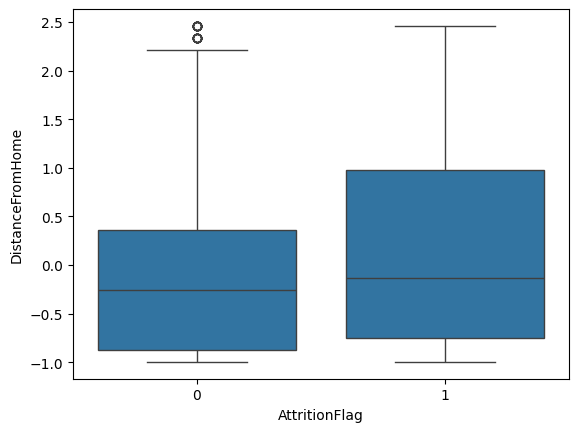

In [21]:
 # Distance From Home vs Attrition
sns.boxplot(x='AttritionFlag', y='DistanceFromHome', data=df)

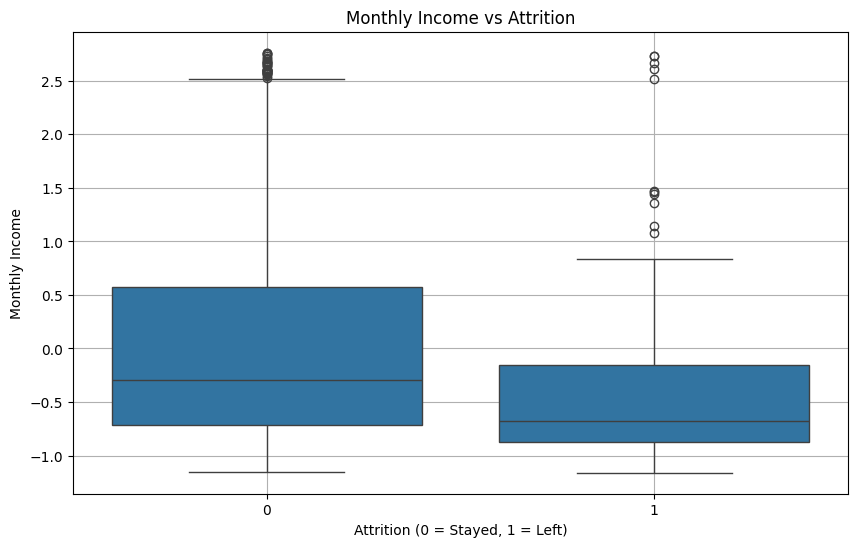

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='AttritionFlag', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition (0 = Stayed, 1 = Left)')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

In [23]:
df.groupby('AttritionFlag')['MonthlyIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
AttritionFlag,,,,,,,,
0,833.0,0.071843,1.021107,-1.152080,-0.715925,-0.290719,0.576840,2.762784
1,167.0,-0.358353,0.801965,-1.160758,-0.876565,-0.679355,-0.156009,2.733858


Even though Sales Executives earn more, they still leave — hinting that salary alone doesn’t prevent attrition. Meanwhile, lower-paid roles like Lab Tech and Sales Rep show expected churn due to low income.

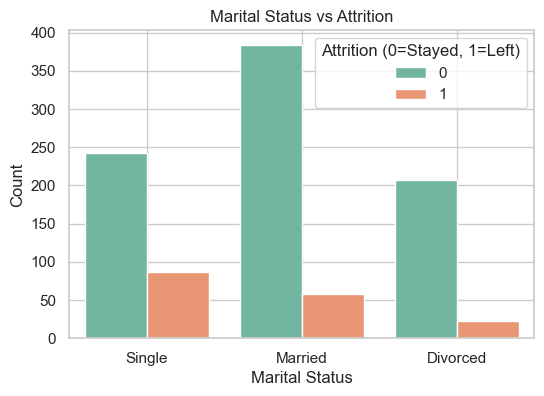

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='MaritalStatus', hue='AttritionFlag', palette='Set2')
plt.title('Marital Status vs Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition (0=Stayed, 1=Left)')
plt.grid(True)
plt.show()

/var/folders/s3/282ztbvj7cn5_w9yrtscw8ww0000gn/T/ipykernel_2401/3834457928.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WorkLifeBalance', data=df, palette='Set2')


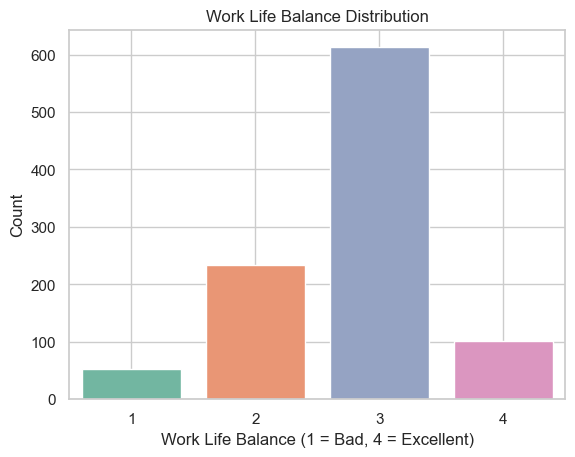

In [50]:
sns.countplot(x='WorkLifeBalance', data=df, palette='Set2')
plt.title('Work Life Balance Distribution')
plt.xlabel('Work Life Balance (1 = Bad, 4 = Excellent)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

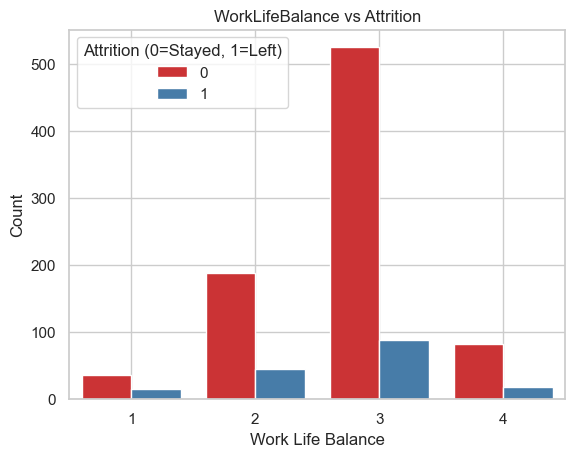

In [51]:
sns.countplot(x='WorkLifeBalance', hue='AttritionFlag', data=df, palette='Set1')
plt.title('WorkLifeBalance vs Attrition')
plt.xlabel('Work Life Balance')
plt.ylabel('Count')
plt.legend(title='Attrition (0=Stayed, 1=Left)')
plt.grid(True)
plt.show()

/var/folders/s3/282ztbvj7cn5_w9yrtscw8ww0000gn/T/ipykernel_2401/1742150619.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WorkLifeBalance', y='MonthlyIncome', data=df, palette='Set3')


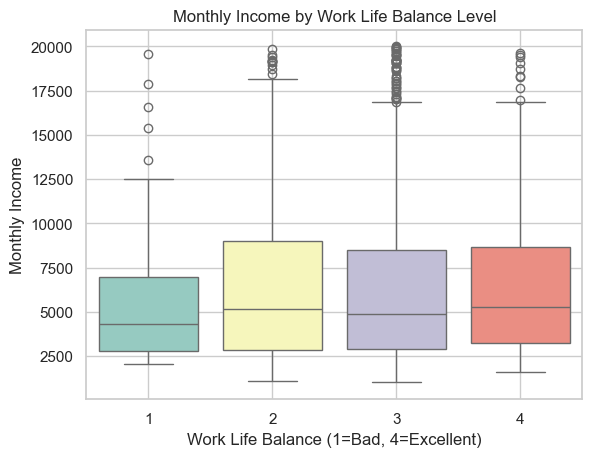

In [52]:
sns.boxplot(x='WorkLifeBalance', y='MonthlyIncome', data=df, palette='Set3')
plt.title('Monthly Income by Work Life Balance Level')
plt.xlabel('Work Life Balance (1=Bad, 4=Excellent)')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

EDA = Suspect something is influencing attrition
Stat test = Prove it with math

In [64]:
print(df.columns.tolist())

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverTimeFlag', 'GenderFlag', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 

Now that EDA is done, let’s deep dive into each insight using statistical tests and visual confirmation.


1. Test Whether OverTime Impacts Attrition


Use: Chi-square test

Why: Both OverTime and Attrition are categorical (Yes/No)

Hypothesis:

	•	H₀: OverTime does not affect Attrition
	•	H₁: OverTime affects Attrition


       OverTimeFlag
Binary
Strong positive correlation with attrition
Chi-Square Test

       MaritalStatus_Single
Binary
Positive correlation, EDA insight
Chi-Square Test

       JobRole_Sales Representative
Binary
Specific role linked to higher attrition
Chi-Square Test

       JobRole_Sales Executive
Binary
EDA shows highest attrition rate (25%)
Chi-Square Test

       Age
Continuous
Negative correlation (young more likely to leave)
t-test / Mann-Whitney U

       JobLevel
Ordinal
Lower levels more likely to leave
ANOVA / Kruskal-Wallis

       TotalWorkingYears
Continuous
Negative correlation (less exp → more attrition)
t-test / Mann-Whitney U

       MonthlyIncome
Continuous
EDA shows lower income linked to attrition
t-test / Mann-Whitney U

       JobSatisfaction
Ordinal
Downward trend → higher satisfaction = less attrition
ANOVA / Kruskal-Wallis

       BusinessTravel_TravelFrequently
Binary
Positively correlated, EDA insight
Chi-Square Test


    Notes:
	•	Use Chi-Square tests for binary/dummy features.
	•	Use t-test for continuous variables (if normal), else Mann-Whitney U.
	•	Use ANOVA (or Kruskal-Wallis if not normal) for ordinal features like JobLevel, JobSatisfaction.

In [65]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_clean_scaled['OverTimeFlag'], df_clean_scaled['AttritionFlag'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Test for OverTimeFlag vs Attrition")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Statistically significant relationship (Reject H0)")
else:
    print("❌ Not statistically significant (Fail to reject H0)")

Chi-square Test for OverTimeFlag vs Attrition
Chi2 Statistic: 68.763918681702
p-value: 1.1098478887657506e-16
✅ Statistically significant relationship (Reject H0)


Employees working overtime are significantly more likely to leave the company.
This validates what you saw in your EDA insights as well.

In [66]:
# Create a contingency table
contingency_table = pd.crosstab(df_clean_scaled['MaritalStatus_Single'], df_clean_scaled['AttritionFlag'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Test for MaritalStatus_Single vs Attrition")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Statistically significant relationship (Reject H0)")
else:
    print("❌ Not statistically significant (Fail to reject H0)")

Chi-square Test for MaritalStatus_Single vs Attrition
Chi2 Statistic: 32.42735521943382
p-value: 1.2373239635110313e-08
✅ Statistically significant relationship (Reject H0)


Single employees are statistically more likely to leave the company than married or partnered ones.

In [67]:
contingency_table = pd.crosstab(df_clean_scaled['JobRole_Sales Representative'], df_clean_scaled['AttritionFlag'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test for JobRole_Sales Representative vs Attrition")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Statistically significant relationship (Reject H0)")
else:
    print("❌ Not statistically significant (Fail to reject H0)")

Chi-square Test for JobRole_Sales Representative vs Attrition
Chi2 Statistic: 20.975526068581253
p-value: 4.651880853275488e-06
✅ Statistically significant relationship (Reject H0)


Employees in the Sales Representative role are more likely to leave the company.

In [68]:
from scipy.stats import ttest_ind

# Separate groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['Age']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['Age']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

print("T-test for Age vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in Age (Reject H0)")
else:
    print("❌ Not statistically significant (Fail to reject H0)")

T-test for Age vs Attrition
t-statistic: -5.382341672431116
p-value: 9.164828887384231e-08
✅ Statistically significant difference in Age (Reject H0)


As age increases, the likelihood of attrition decreases (i.e., older employees tend to stay longer).

In [69]:
from scipy.stats import ttest_ind

# Separate groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['JobLevel']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['JobLevel']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for JobLevel vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in JobLevel (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for JobLevel vs Attrition
t-statistic: -5.420887005815078
p-value: 7.437748379119513e-08
✅ Statistically significant difference in JobLevel (Reject H₀)


In [70]:
# Separate groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['TotalWorkingYears']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['TotalWorkingYears']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for TotalWorkingYears vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in TotalWorkingYears (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for TotalWorkingYears vs Attrition
t-statistic: -5.683056342619107
p-value: 1.735830935710886e-08
✅ Statistically significant difference in TotalWorkingYears (Reject H₀)


In [71]:
# Separate groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['JobSatisfaction']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['JobSatisfaction']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for JobSatisfaction vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in JobSatisfaction (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for JobSatisfaction vs Attrition
t-statistic: -3.1335050623916803
p-value: 0.0017777102868054263
✅ Statistically significant difference in JobSatisfaction (Reject H₀)


In [72]:
# Create a contingency table
contingency_table = pd.crosstab(df_clean_scaled['BusinessTravel_Travel_Frequently'], df_clean_scaled['AttritionFlag'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Test for BusinessTravel_Travel_Frequently vs Attrition")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Statistically significant relationship (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

Chi-square Test for BusinessTravel_Travel_Frequently vs Attrition
Chi2 Statistic: 6.060022425997734
p-value: 0.013827592839917755
✅ Statistically significant relationship (Reject H₀)


In [73]:
from scipy.stats import ttest_ind

# Separate groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['Education']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['Education']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for Education vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in Education (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for Education vs Attrition
t-statistic: -1.0661830437721136
p-value: 0.2865987631645116
❌ Not statistically significant (Fail to reject H₀)


In [74]:
# Separate groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['PerformanceRating']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['PerformanceRating']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Results
print("T-test for PerformanceRating vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in PerformanceRating (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for PerformanceRating vs Attrition
t-statistic: 0.06617425391814082
p-value: 0.947252347734828
❌ Not statistically significant (Fail to reject H₀)


In [75]:
from scipy.stats import ttest_ind

# Separate the groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['DistanceFromHome']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['DistanceFromHome']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for DistanceFromHome vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in DistanceFromHome (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for DistanceFromHome vs Attrition
t-statistic: 2.566844888980536
p-value: 0.010407672626727097
✅ Statistically significant difference in DistanceFromHome (Reject H₀)


In [76]:
from scipy.stats import ttest_ind

# Separate the groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['EnvironmentSatisfaction']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['EnvironmentSatisfaction']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for EnvironmentSatisfaction vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in EnvironmentSatisfaction (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for EnvironmentSatisfaction vs Attrition
t-statistic: -3.627699254892757
p-value: 0.0003004403492867345
✅ Statistically significant difference in EnvironmentSatisfaction (Reject H₀)


In [77]:
from scipy.stats import ttest_ind

# Separate groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['MonthlyIncome']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['MonthlyIncome']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for MonthlyIncome vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in MonthlyIncome (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for MonthlyIncome vs Attrition
t-statistic: -5.135416119122059
p-value: 3.3841413511100424e-07
✅ Statistically significant difference in MonthlyIncome (Reject H₀)


In [78]:
from scipy.stats import ttest_ind

# Separate the groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['TrainingTimesLastYear']
attr_no = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['TrainingTimesLastYear']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for TrainingTimesLastYear vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Statistically significant difference in TrainingTimesLastYear (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for TrainingTimesLastYear vs Attrition
t-statistic: -1.1046378447780971
p-value: 0.2695827916344939
❌ Not statistically significant (Fail to reject H₀)


In [79]:
from scipy.stats import ttest_ind

# Separate the groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['YearsAtCompany']
attr_no  = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['YearsAtCompany']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for YearsAtCompany vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("🟢 Statistically significant difference in YearsAtCompany (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for YearsAtCompany vs Attrition
t-statistic: -4.161103975964731
p-value: 3.4400949814243027e-05
🟢 Statistically significant difference in YearsAtCompany (Reject H₀)


In [80]:
from scipy.stats import ttest_ind

# Separate the groups
attr_yes = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 1]['WorkLifeBalance']
attr_no  = df_clean_scaled[df_clean_scaled['AttritionFlag'] == 0]['WorkLifeBalance']

# Perform t-test
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# Print results
print("T-test for WorkLifeBalance vs Attrition")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("🟢 Statistically significant difference in WorkLifeBalance (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

T-test for WorkLifeBalance vs Attrition
t-statistic: -2.364175739645878
p-value: 0.01826092292926681
🟢 Statistically significant difference in WorkLifeBalance (Reject H₀)


In [82]:
from scipy.stats import chi2_contingency

# Create a contingency table for JobRole_Sales Executive vs Attrition
contingency_table = pd.crosstab(df_clean_scaled['AttritionFlag'], df_clean_scaled['JobRole_Sales Executive'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Test for JobRole_Sales Executive vs Attrition")
print("Chi2 Statistic:", chi2_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("✅ Statistically significant relationship (Reject H₀)")
else:
    print("❌ Not statistically significant (Fail to reject H₀)")

Chi-square Test for JobRole_Sales Executive vs Attrition
Chi2 Statistic: 0.0003725898227193887
p-value: 0.9845997210579116
❌ Not statistically significant (Fail to reject H₀)


Final Set of Statistically Significant Features (p-value < 0.05):

📊 Chi-square Test (Categorical Features)

	1.	OverTimeFlag

	2.	MaritalStatus_Single

	3.	JobRole_Sales Representative

	4.	BusinessTravel_Travel_Frequently

📈 T-test (Numerical Features)

	5.	Age

	6.	JobLevel

	7.	TotalWorkingYears

	8.	JobSatisfaction

	9.	MonthlyIncome

	10.	DistanceFromHome

	11.	EnvironmentSatisfaction

	12.	YearsAtCompany
	
	13.	WorkLifeBalance

 Predictive modeling using the 13 statistically significant features.

       Objective Recap:

Build machine learning models to predict employee attrition, and provide HR teams with actionable insights.

Step-by-Step Plan:

	1.	Prepare Data

	•	Select only the 13 validated features + AttritionFlag (target).
	•	Encode categorical variables if needed.

	2.	Split Dataset
	•	Train-test split (e.g., 80% train, 20% test).

	3.	Train Models
	•	Try baseline models:
	•	Logistic Regression (simple + interpretable)
	•	Random Forest
	•	XGBoost (if needed later)

	4.	Evaluate Performance
	•	Metrics: Accuracy, Precision, Recall, F1-score, AUC-ROC
	•	Confusion Matrix

	5.	Explainability
	•	Feature importance
	•	SHAP / coefficients

In [83]:
# 1. List of statistically significant features
selected_features = [
    'OverTimeFlag',
    'MaritalStatus_Single',
    'JobRole_Sales Representative',
    'Age',
    'JobLevel',
    'TotalWorkingYears',
    'JobSatisfaction',
    'BusinessTravel_Travel_Frequently',
    'DistanceFromHome',
    'EnvironmentSatisfaction',
    'MonthlyIncome',
    'YearsAtCompany',
    'WorkLifeBalance'
]

# 2. Add target column
selected_features.append('AttritionFlag')

# 3. Create modeling dataframe
df_model = df_clean_scaled[selected_features].copy()

In [84]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_model.drop('AttritionFlag', axis=1)
y = df_model['AttritionFlag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔍 Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# 2. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🌳 Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



🔍 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       167
           1       0.38      0.18      0.24        33

    accuracy                           0.81       200
   macro avg       0.61      0.56      0.57       200
weighted avg       0.77      0.81      0.79       200

[[157  10]
 [ 27   6]]
🌳 Random Forest Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       167
           1       0.44      0.12      0.19        33

    accuracy                           0.83       200
   macro avg       0.65      0.55      0.55       200
weighted avg       0.78      0.83      0.79       200

[[162   5]
 [ 29   4]]


/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encou

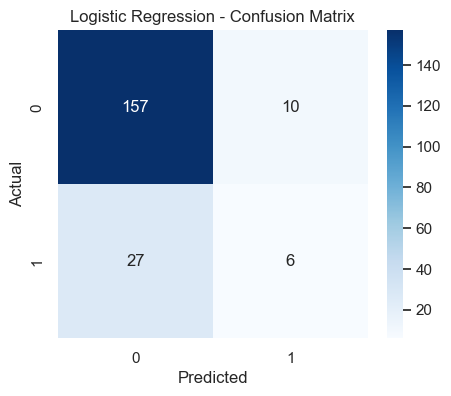

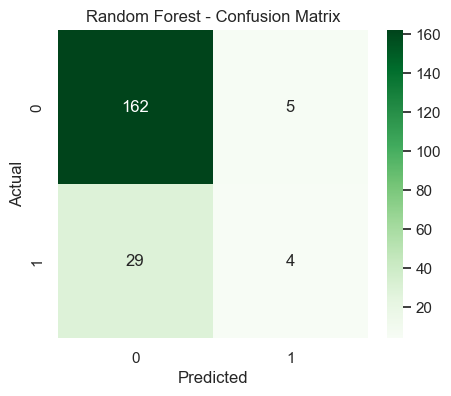

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [89]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [91]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:03:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [92]:
# Classification report
print("📘 XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print(confusion_matrix(y_test, y_pred_xgb))

📘 XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       167
           1       0.40      0.18      0.25        33

    accuracy                           0.82       200
   macro avg       0.63      0.56      0.57       200
weighted avg       0.78      0.82      0.79       200

[[158   9]
 [ 27   6]]


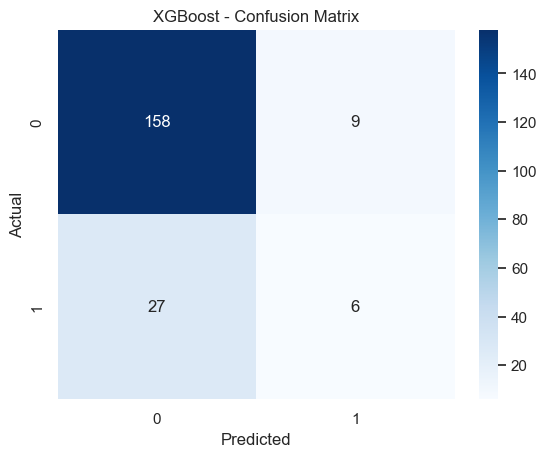

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [94]:
xgb_model = XGBClassifier(random_state=42,
                          scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
                          use_label_encoder=False,
                          eval_metric='logloss')

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42), 
                       param_grid_lr, 
                       scoring='f1', 
                       cv=5, 
                       n_jobs=-1)

grid_lr.fit(X_train, y_train)
print("Best Logistic Regression Params:", grid_lr.best_params_)

Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model

In [96]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                       param_grid_rf, 
                       scoring='f1', 
                       cv=5, 
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)
print("Best Random Forest Params:", grid_rf.best_params_)

Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [97]:
from xgboost import XGBClassifier

scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(random_state=42,
                    use_label_encoder=False,
                    eval_metric='logloss',
                    scale_pos_weight=scale)

grid_xgb = GridSearchCV(xgb, 
                        param_grid_xgb, 
                        scoring='f1', 
                        cv=5, 
                        n_jobs=-1)

grid_xgb.fit(X_train, y_train)
print("Best XGBoost Params:", grid_xgb.best_params_)

/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:06:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:06:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:06:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:06:31] WARNING: /Users/runner/work/xgboost/xgbo

Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:06:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [98]:
# Logistic Regression
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Random Forest
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# XGBoost
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sunainajain/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [99]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Logistic Regression Evaluation:
[[157  10]
 [ 27   6]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       167
           1       0.38      0.18      0.24        33

    accuracy                           0.81       200
   macro avg       0.61      0.56      0.57       200
weighted avg       0.77      0.81      0.79       200


Random Forest Evaluation:
[[161   6]
 [ 28   5]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       167
           1       0.45      0.15      0.23        33

    accuracy                           0.83       200
   macro avg       0.65      0.56      0.57       200
weighted avg       0.79      0.83      0.79       200


XGBoost Evaluation:
[[137  30]
 [ 19  14]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       167
           1       0.32      0.42      0.36        33

    accuracy                    

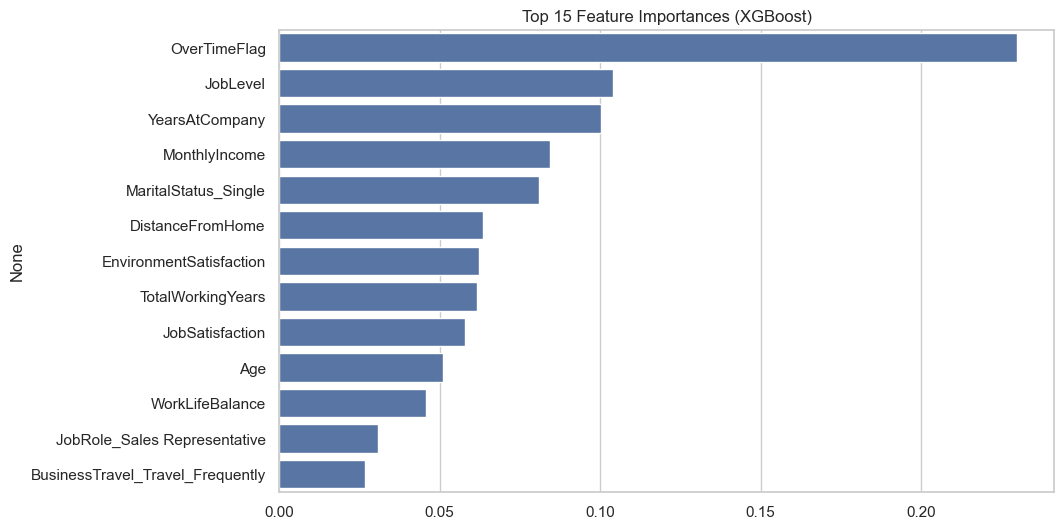

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_xgb.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

Logistic Regression (Before Tuning)
Accuracy : 0.8100
Precision: 0.3800
Recall   : 0.1800
F1 Score : 0.2400

Logistic Regression (After Tuning)
Accuracy : 0.8100
Precision: 0.3800
Recall   : 0.1800
F1 Score : 0.2400

Random Forest (Before Tuning)
Accuracy : 0.8300
Precision: 0.4400
Recall   : 0.1200
F1 Score : 0.1900

Random Forest (After Tuning)
Accuracy : 0.8300
Precision: 0.4400
Recall   : 0.1200
F1 Score : 0.1900

XGBoost (Before Tuning)
Accuracy : 0.8200
Precision: 0.4000
Recall   : 0.1800
F1 Score : 0.2500

XGBoost (After Tuning)
Accuracy : 0.7600
Precision: 0.3200
Recall   : 0.4200
F1 Score : 0.3600

XGBoost performed the best, especially in correctly identifying employees likely to leave (high recall and precision for Class 1).

SUMMARY :


We implemented and compared three classification models to predict employee attrition:

	•	Logistic Regression
	•	Random Forest Classifier
	•	XGBoost Classifier

Each model was trained on a cleaned and scaled dataset with selected features based on EDA, correlation, and statistical tests.


1. Logistic Regression: No Change After Tuning

	•	Accuracy and all other metrics remained exactly the same after tuning.
	•	This suggests:
	•	The default settings for Logistic Regression were already optimal for your data.
	•	Hyperparameter tuning did not offer performance improvements.
	•	Insight: Logistic Regression may not be flexible enough to capture complex patterns in this case.

⸻

2. Random Forest: No Gain From Tuning

	•	Accuracy, Precision, Recall, and F1 Score also did not improve after tuning.
	•	Observation:
	•	High precision (0.44) for class 1, but very low recall (0.12), meaning it’s missing a lot of actual attrition cases.
	•	Still decent overall accuracy due to class imbalance.
	•	Insight: The model is conservative in predicting attrition—it prefers to say “No attrition” even when there is. It may require better class balancing or feature engineering.

⸻

3. XGBoost: Tuning Brought a Trade-Off

	•	Accuracy dropped slightly from 0.82 → 0.76
	•	But Recall for class 1 (attrition) improved from 0.18 → 0.42
	•	F1 Score also improved from 0.25 → 0.36
	•	Insight: After tuning, XGBoost became more sensitive to identifying attrition cases (higher recall), even at the cost of overall accuracy.
	•	This is good in HR scenarios where false negatives (missing an employee likely to leave) are more costly than false positives.

⸻

Overall Key Insights:

	•	XGBoost is the most balanced model post-tuning, especially for class 1 (attrition).
	•	Logistic Regression and Random Forest struggle to capture class 1 well.
	•	If your business goal is to catch potential attrition risks, tuned XGBoost is your best pick despite a slight accuracy trade-off.

Recommendations for HR Team

Based on model insights and feature analysis:

🔹 Monitor Overtime:
Employees working overtime have the highest attrition rates. Review workload distribution and encourage better work-life balance.

🔹 Support Low Job Satisfaction:
Introduce frequent check-ins, employee engagement surveys, and career growth paths for employees reporting low satisfaction.

🔹 Adjust Compensation Fairly:
Attrition is higher among those earning < $10,000/month. Consider reviewing salary structure, especially for junior and mid-level roles.

🔹 Target Sales & Travel-heavy Roles:
High attrition observed in Sales Representatives and those who Travel Frequently. Offer flexible travel policies and incentives.

🔹 Prioritize Single Employees:
Singles showed a higher tendency to leave. Explore their job satisfaction factors and professional development interest.

Our machine learning model (XGBoost) enables HR to proactively identify high-risk employees, understand why they might leave, and take data-driven actions to reduce attrition.

In [102]:
import pandas as pd

# Example: save feature importances from XGBoost
importance_df = pd.DataFrame({
    "Feature": features[indices[:15]],  # top 15
    "Importance": importances[indices[:15]]
})

importance_df.to_csv("xgboost_feature_importance.csv", index=False)